In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# %matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
# os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력
from collections import Counter
from glob import glob


# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# tqdm
from tqdm.notebook import tqdm

# 이유한님
 # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno
# plt.style.use('seaborn')
# sns.set(font_scale=1)

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

## 1. 데이터 불러오기

In [3]:
train = pd.read_csv('c://reposit/data/kaggle/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('c://reposit/data/kaggle/porto-seguro-safe-driver-prediction/test.csv')

train.shape, test.shape

((595212, 59), (892816, 58))

## 2. 데이터 살펴보기

In [4]:
train.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0


In [5]:
train.tail(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [6]:
# 중복값 제거
train.drop_duplicates().shape

(595212, 59)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## 3. Metadata

In [8]:
# data = []

# for col in train.columns:
    
#     if col == 'target':
#         role = 'target'
#     elif col == 'id':
#         role = 'id'
#     else:
#         role = 'input'
    
    
#     if ('bin' in col) or (col == 'taget'):
#         level = 'binary'
#     elif ('cat' in col) or (col =='id'):
#         level = 'nominal'
#     elif df_train[col].dtype == float:
#         level = 'interval'
#     elif df_train[col].dtype == int:
#         level = 'ordinal'
        
#     keep = True
#     if col == 'id':
#         keep = False
        
        
#     dtype = df_train[col].dtype
    
    
    
#     col_dict = {
#         'varname': col, 
#         'role': role, 
#         'level': level, 
#         'keep': keep, 
#         'dtype': dtype
#     }
    
#     data.append(col_dict)
    

# meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
# meta.set_index('varname', inplace=True)

In [9]:
# meta

In [10]:
# meta[(meta.level=='nominal') & (meta.keep)].index

In [11]:
# pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

In [12]:
data = []

for f in train.columns:
    
    # role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
    
    # keep
    keep = True
    if f == 'id':
        keep = False
    
    # dtype
    dtype = train[f].dtype
    
    
    # DataFrame
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)
    
meta = pd.DataFrame(data=data, columns=['varname', 'role', 'level', 'keep', 'dtype'])

meta.set_index('varname', inplace=True)

In [13]:
train['ps_ind_01'].dtype=='int64'

True

In [14]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [15]:
meta[(meta.level=='nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [16]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

### interval variables

In [17]:
v = meta[(meta.level=='interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### Ordinal variables

In [18]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### Binary variables

In [19]:
v = meta[(meta.level=='binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Handling imbalanced classes

In [20]:
desired_apriori = .10

idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersmapling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired apriori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)


# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)


# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [21]:
undersampling_rate, undersampled_nb_0

undersampled_idx
idx_list
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,...,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,...,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,...,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,...,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,...,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
216936,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
216937,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
216938,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


## Data Quality Checks

### Checking missing value

In [22]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f]==-1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [23]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

In [24]:
v = meta[(meta.level=='nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [25]:
# def add_noise(series, noise_level):
#     return series * (1 + noise_level * np.random*randn(len(series)))

# def target_encode(trn_sries=None, tst_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    
#     assert len(trn_series) == len(target)
#     assert trn_series.name == tst_series.name
    
#     # Compute smoothing
#     smoothing = 1 / (1 + np.exp(-(averages['count'] - min_sample_leaf) / smoothing))
    
#     # Apply average function to all target data
#     prior = target.mean()
    
#     # The bigger the count the less full_avg is taken into account
#     averages[target.name] = prior * (1 - smoothing) + average['mean'] * smoothing
#     averages.drop(['mean', 'count'], axis=1, inplace=True)
    
#     # Apply averages to trn and tst series
#     ft_trn_series = pd.merge(
#         trn_series.to_frame(trn_series_name),
#         averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
#         on=trn_series.name,
#         how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
#     # pd.merge does not keep the index so restore it
#     ft_tst_series.index = tst_series.index
#     return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [26]:
# train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], test['ps_car_11_cat'], target=train.target, min_samples_leaf=100, smoothing=10, noise_level=.01)

# train['ps_car_11_cat_te'] = train_encoded
# train.drop('ps_car_11_cat', axis=1, inplace=True)
# meta.loc['ps_car_11_cat', 'keep'] = False # Updating the meta
# test['ps_car_11_cat_te'] = test_encoded
# test.drop('ps_car_11_cat', axis=1, inplace=True)

In [27]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encoded(trn_series=None,
                   tst_series=None,
                   target=None,
                   min_samples_leaf=1,
                   smoothing=1,
                   noise_level=0):
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    
    # Apply average function to all target data
    prior = target.mean()
    
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_tst_series. index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [28]:
train_encoded, test_encoded = target_encoded(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train.target,
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables

<Figure size 640x480 with 0 Axes>

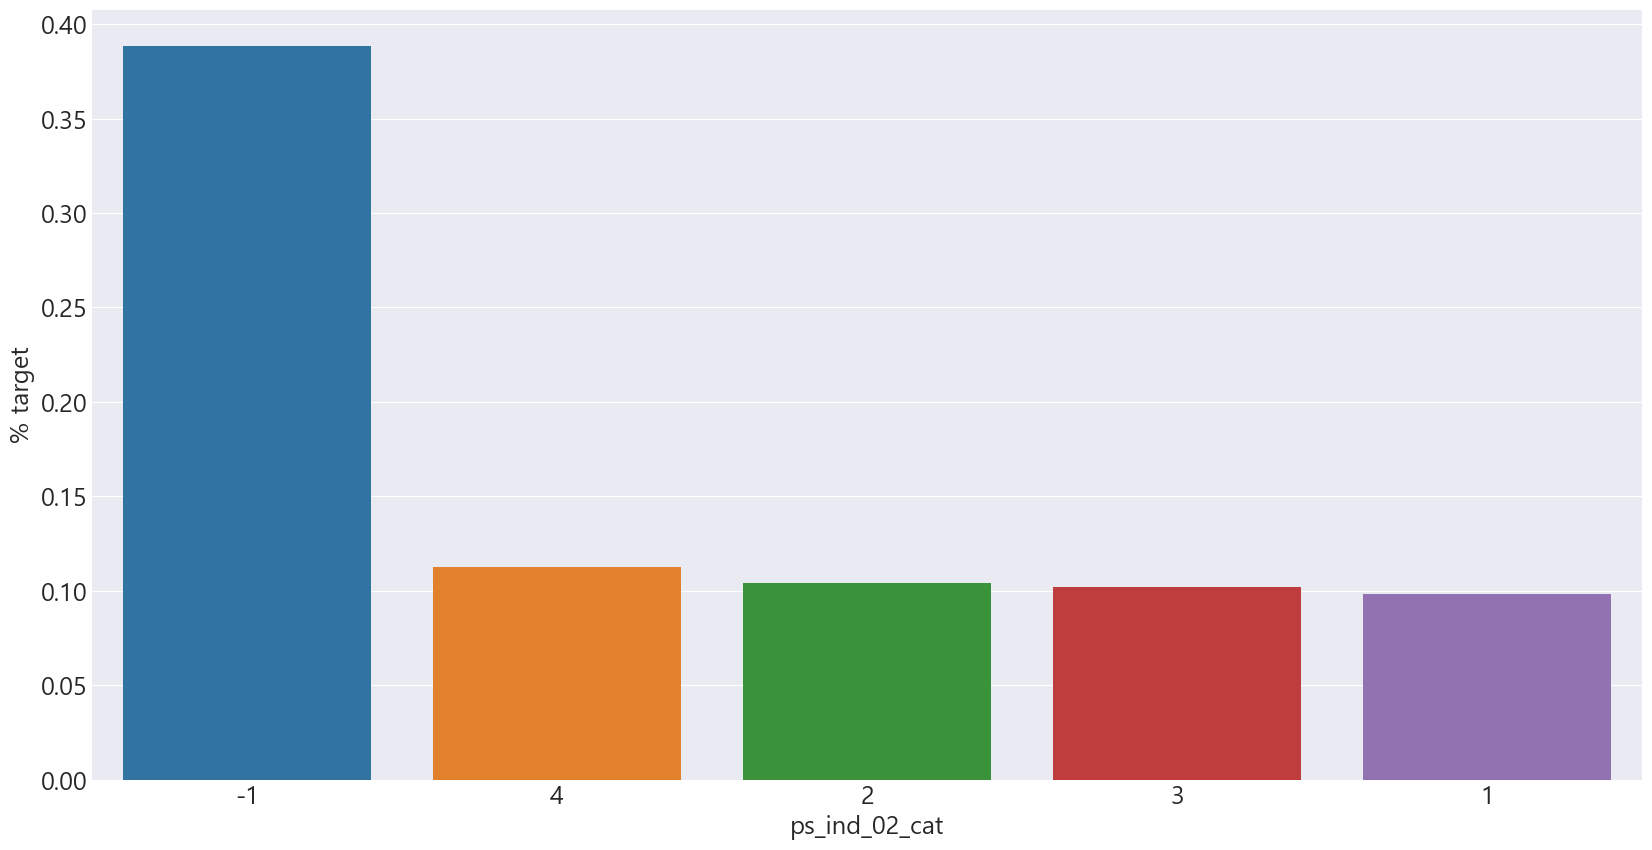

<Figure size 640x480 with 0 Axes>

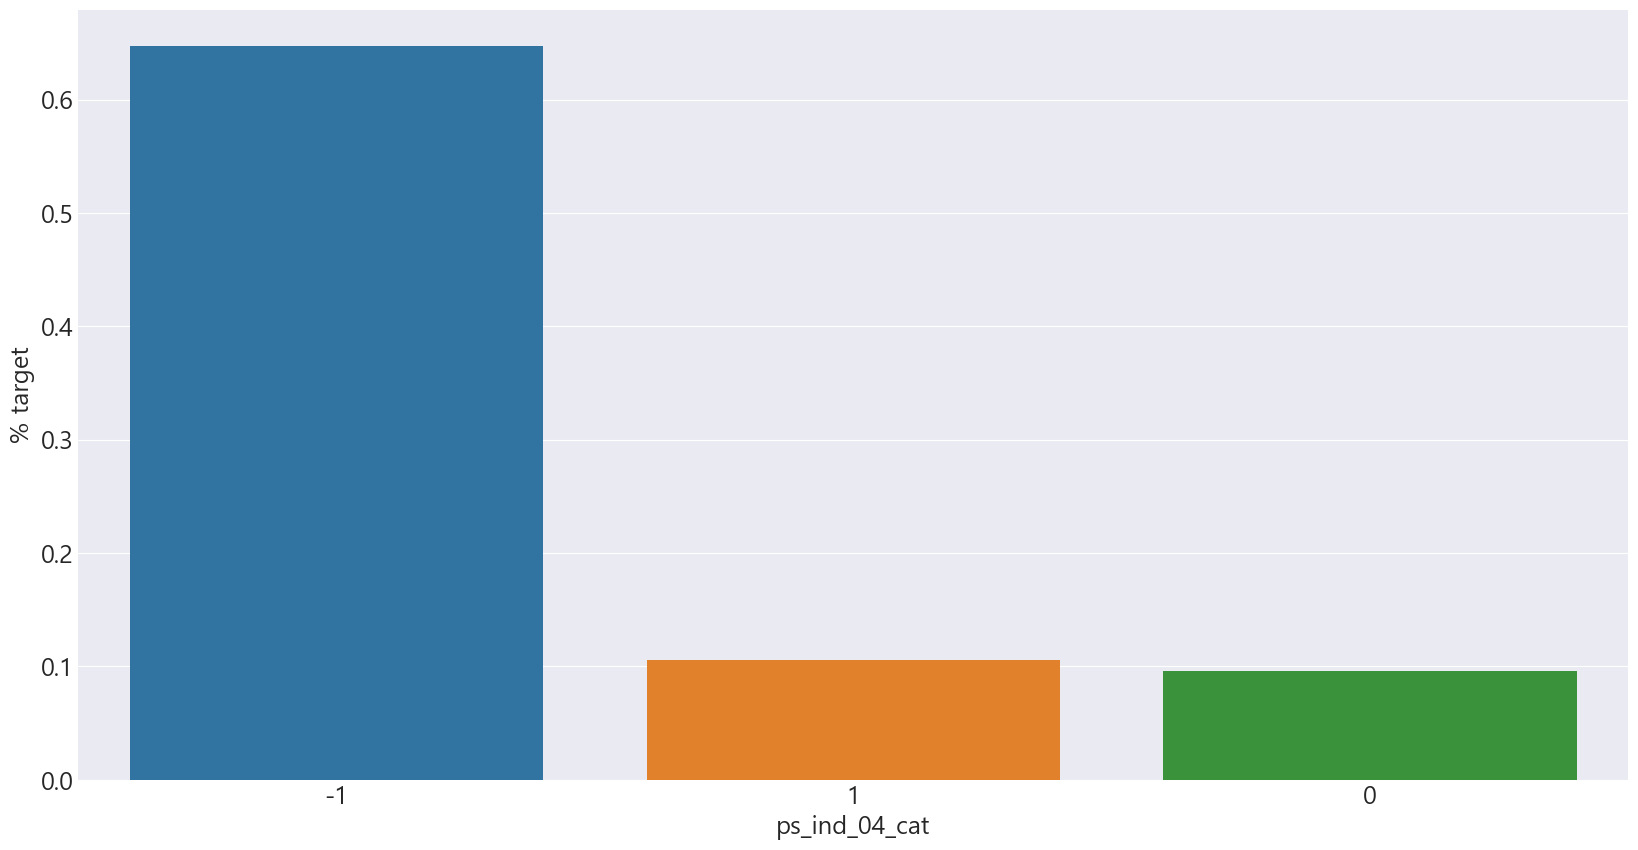

<Figure size 640x480 with 0 Axes>

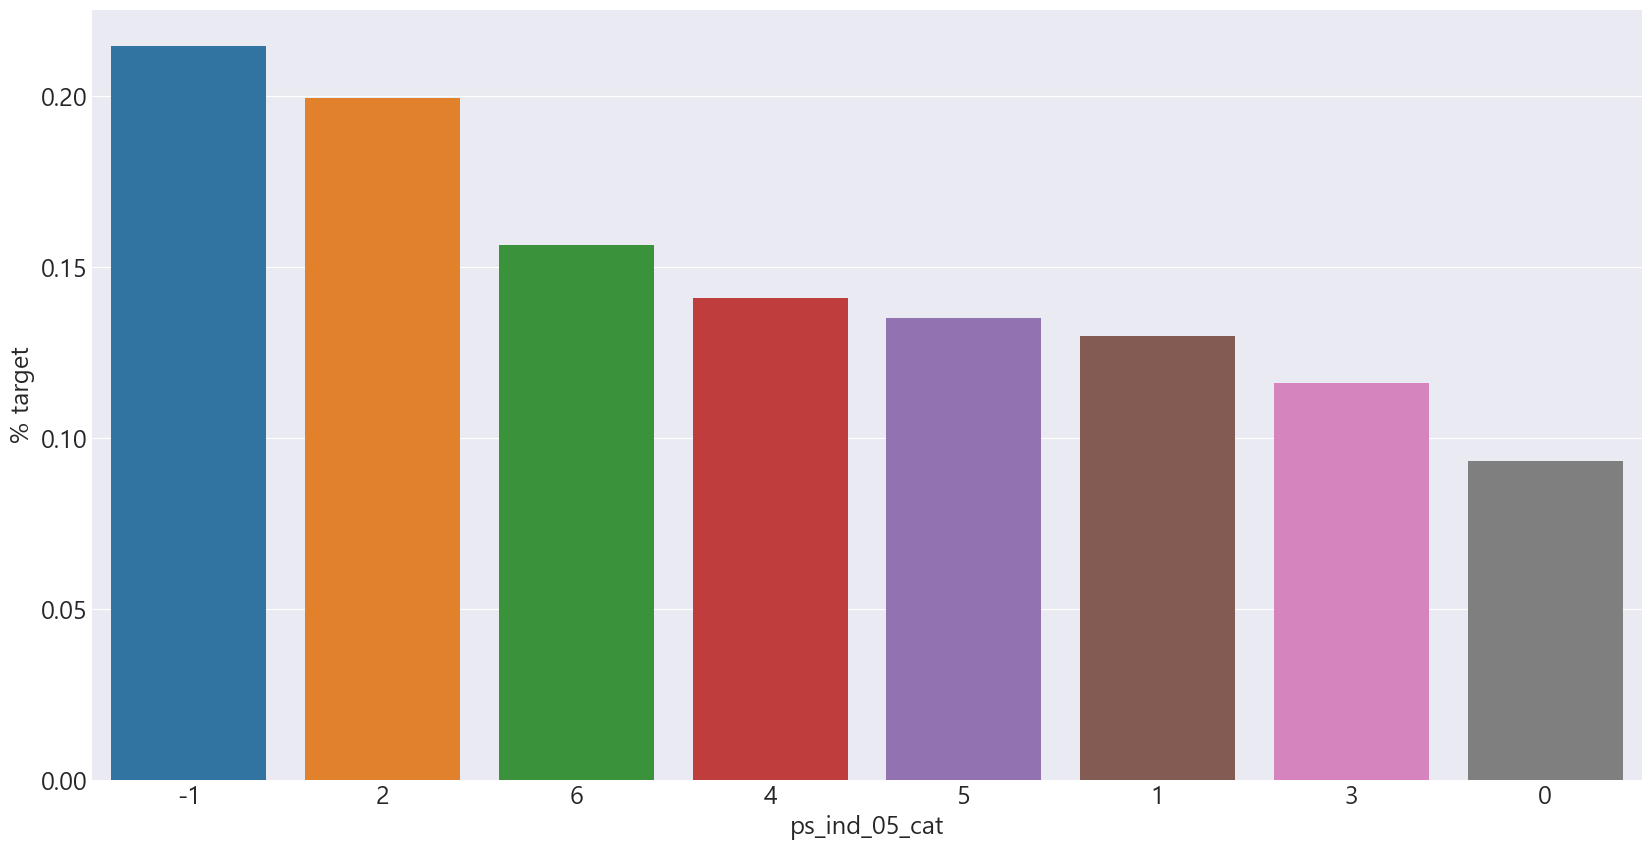

<Figure size 640x480 with 0 Axes>

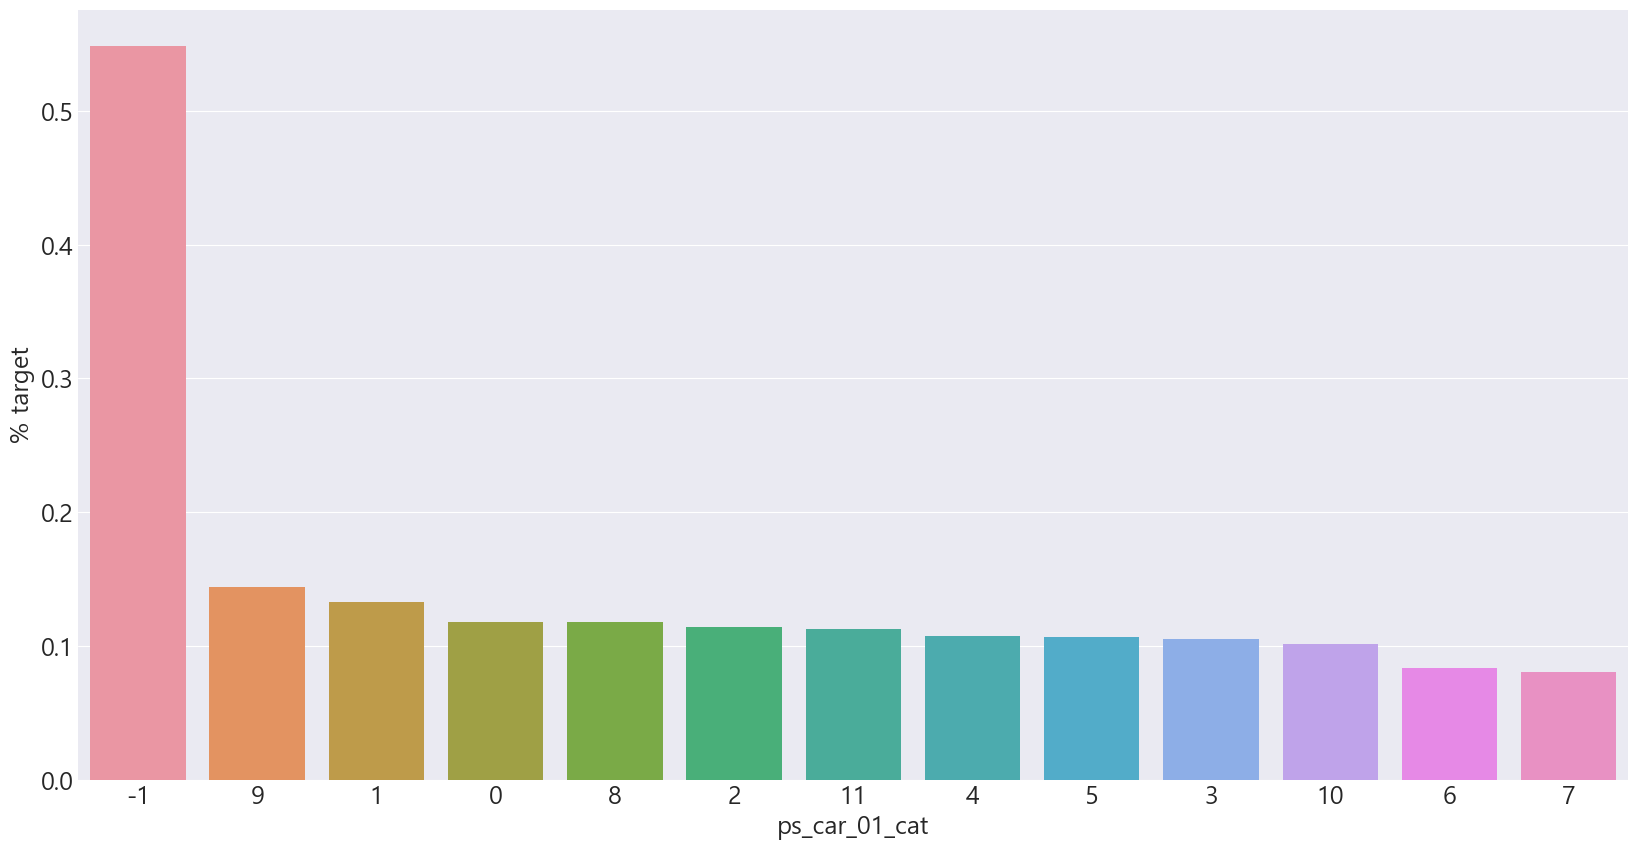

<Figure size 640x480 with 0 Axes>

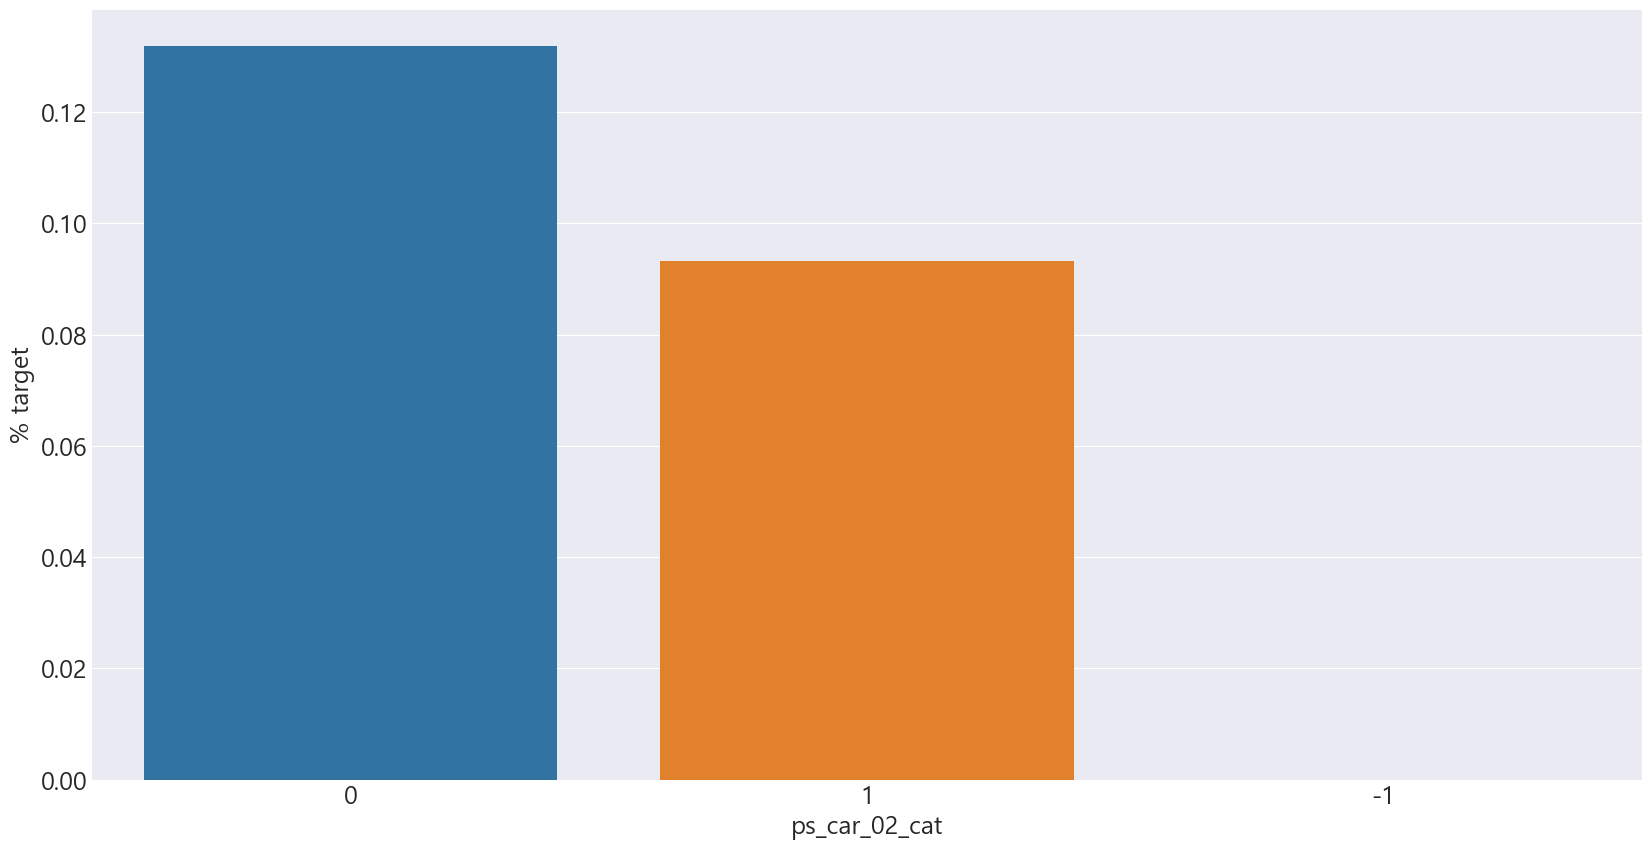

<Figure size 640x480 with 0 Axes>

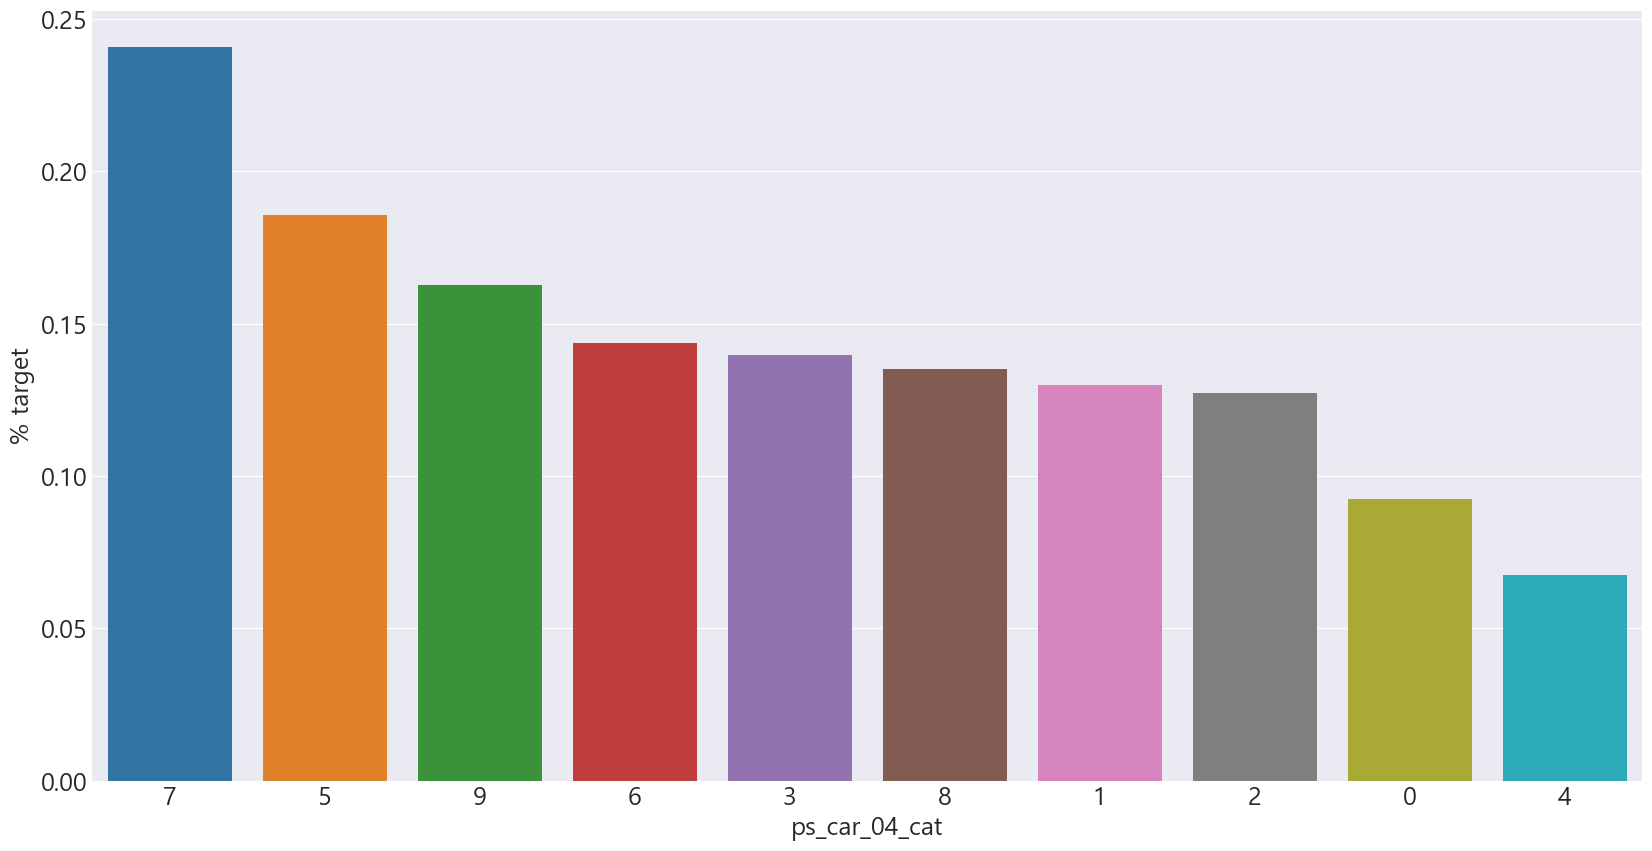

<Figure size 640x480 with 0 Axes>

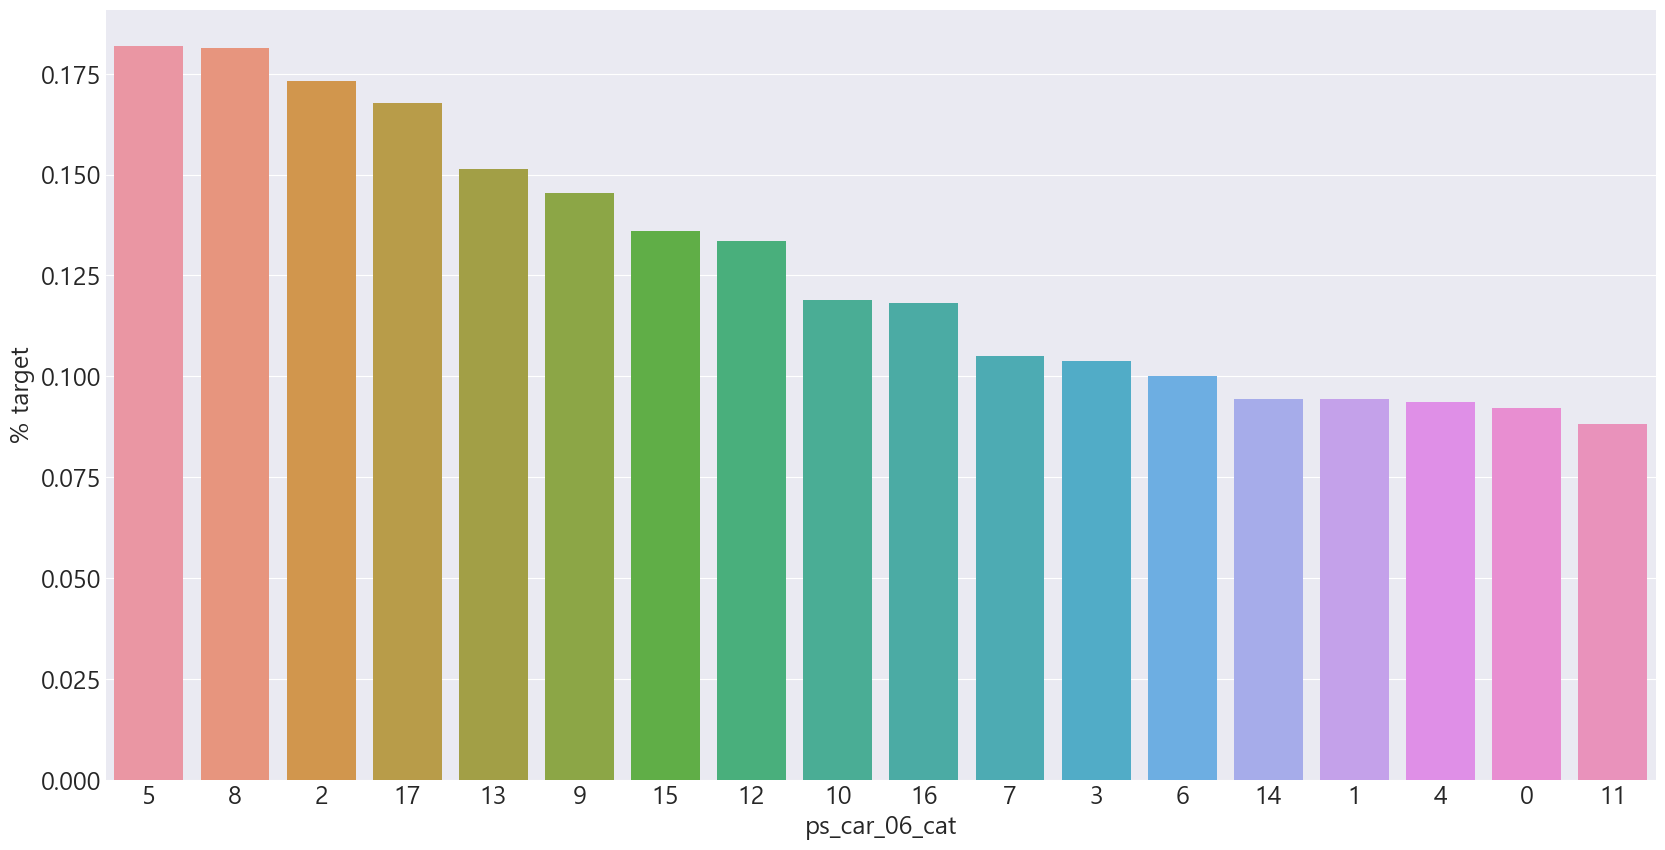

<Figure size 640x480 with 0 Axes>

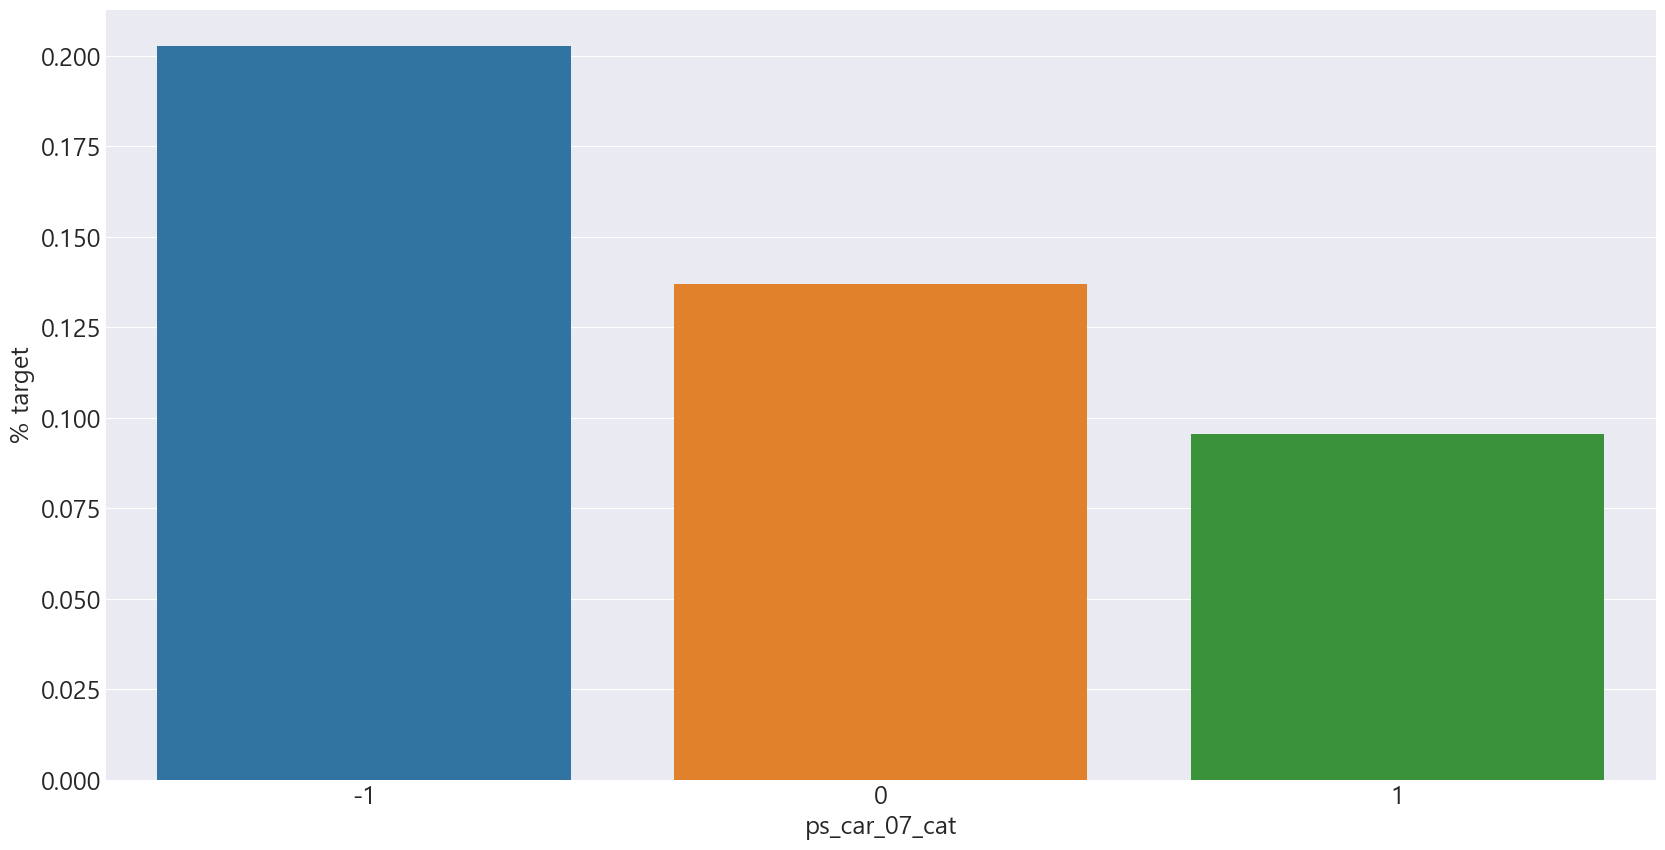

<Figure size 640x480 with 0 Axes>

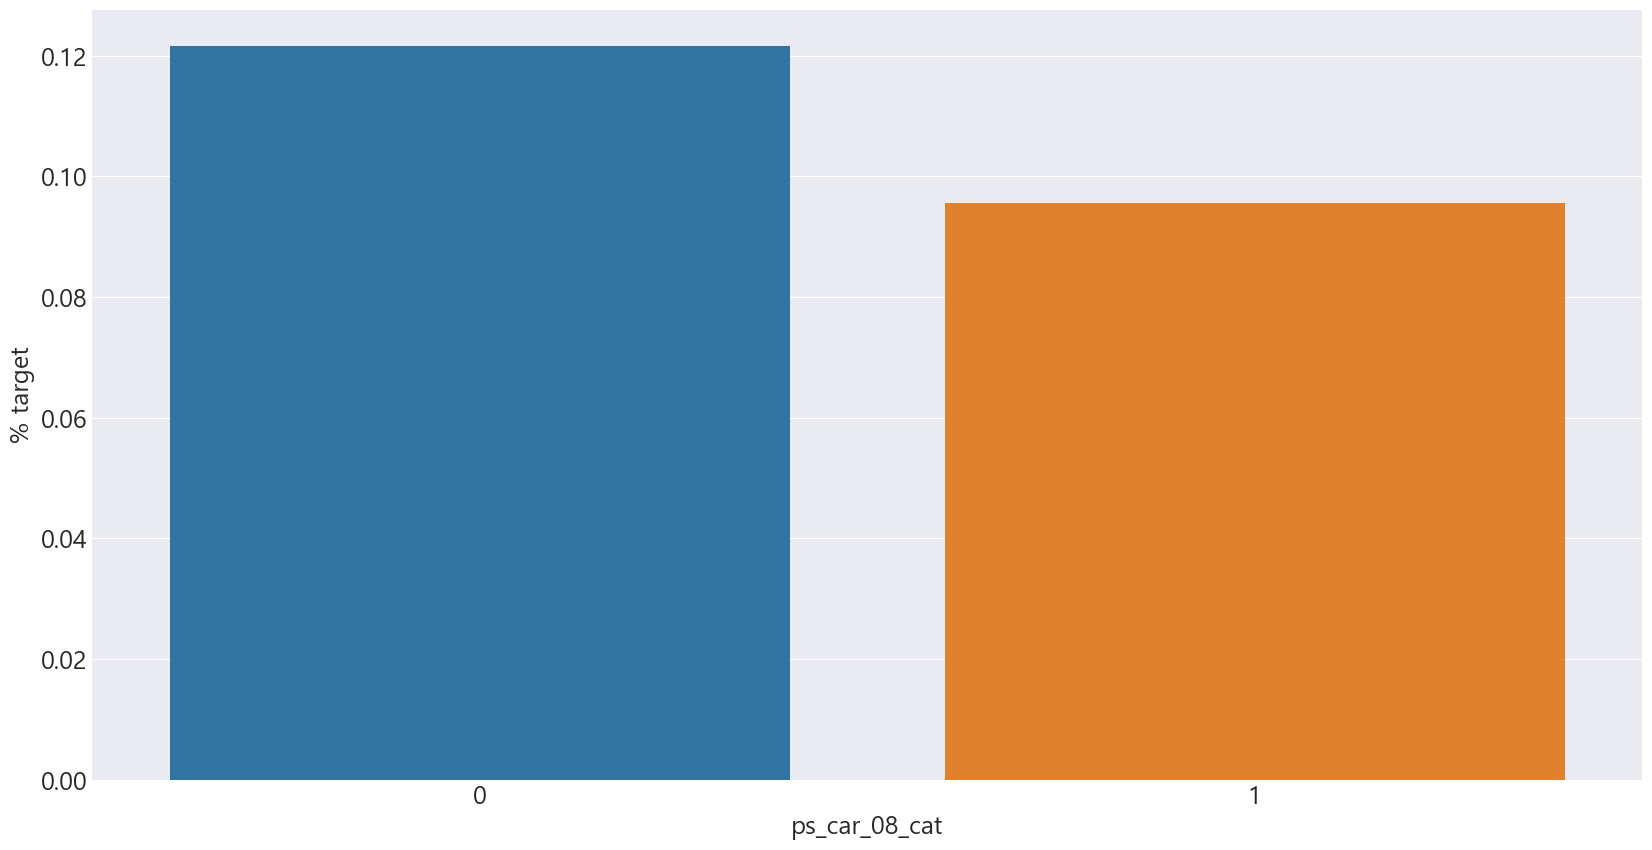

<Figure size 640x480 with 0 Axes>

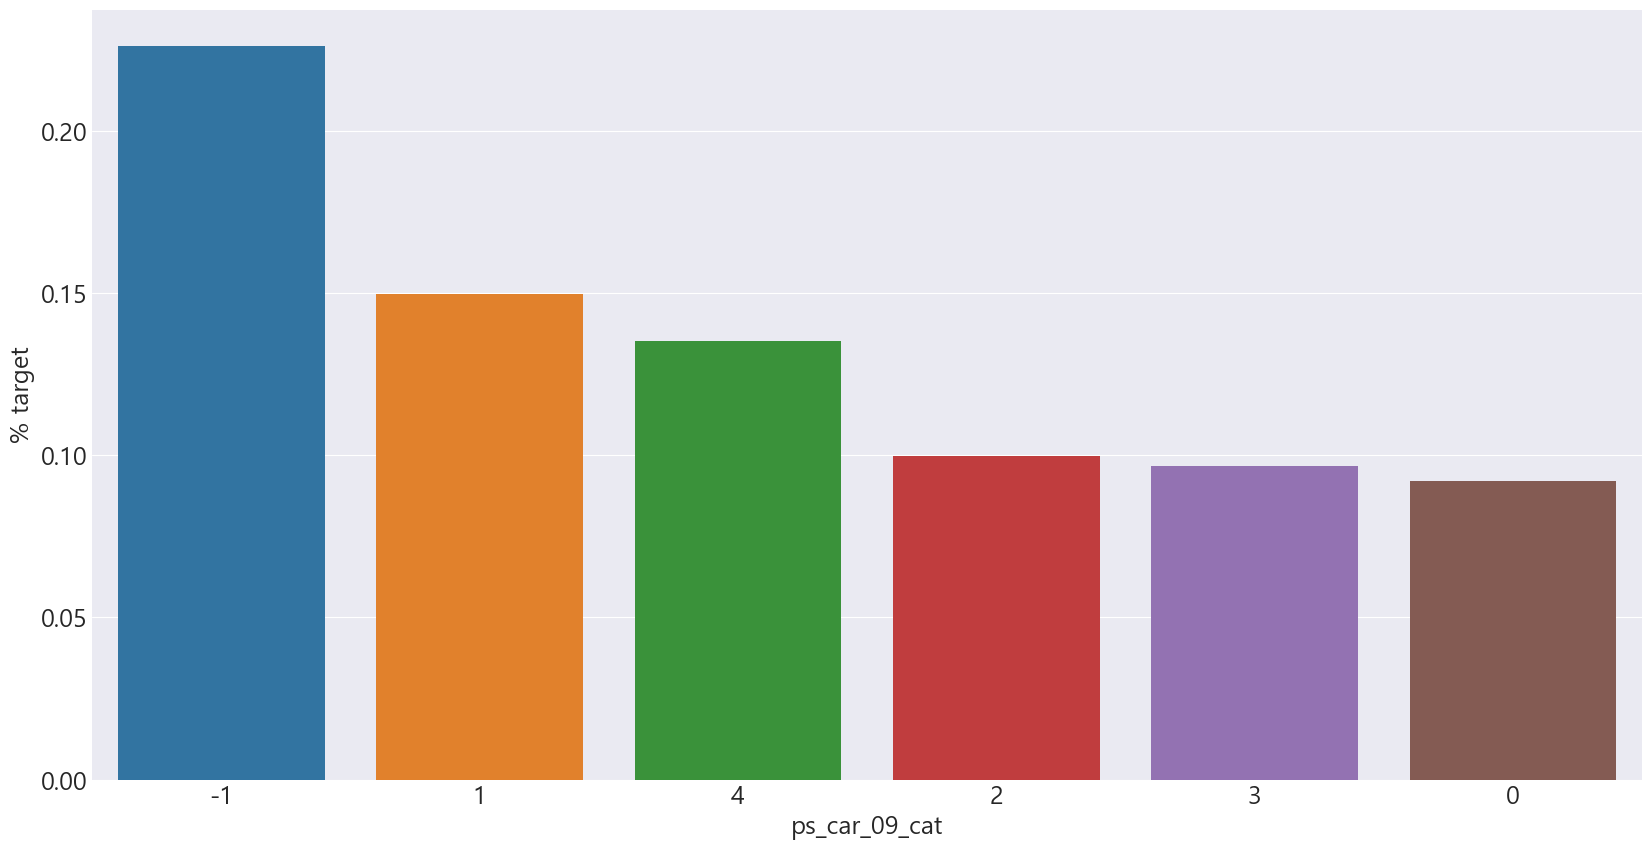

<Figure size 640x480 with 0 Axes>

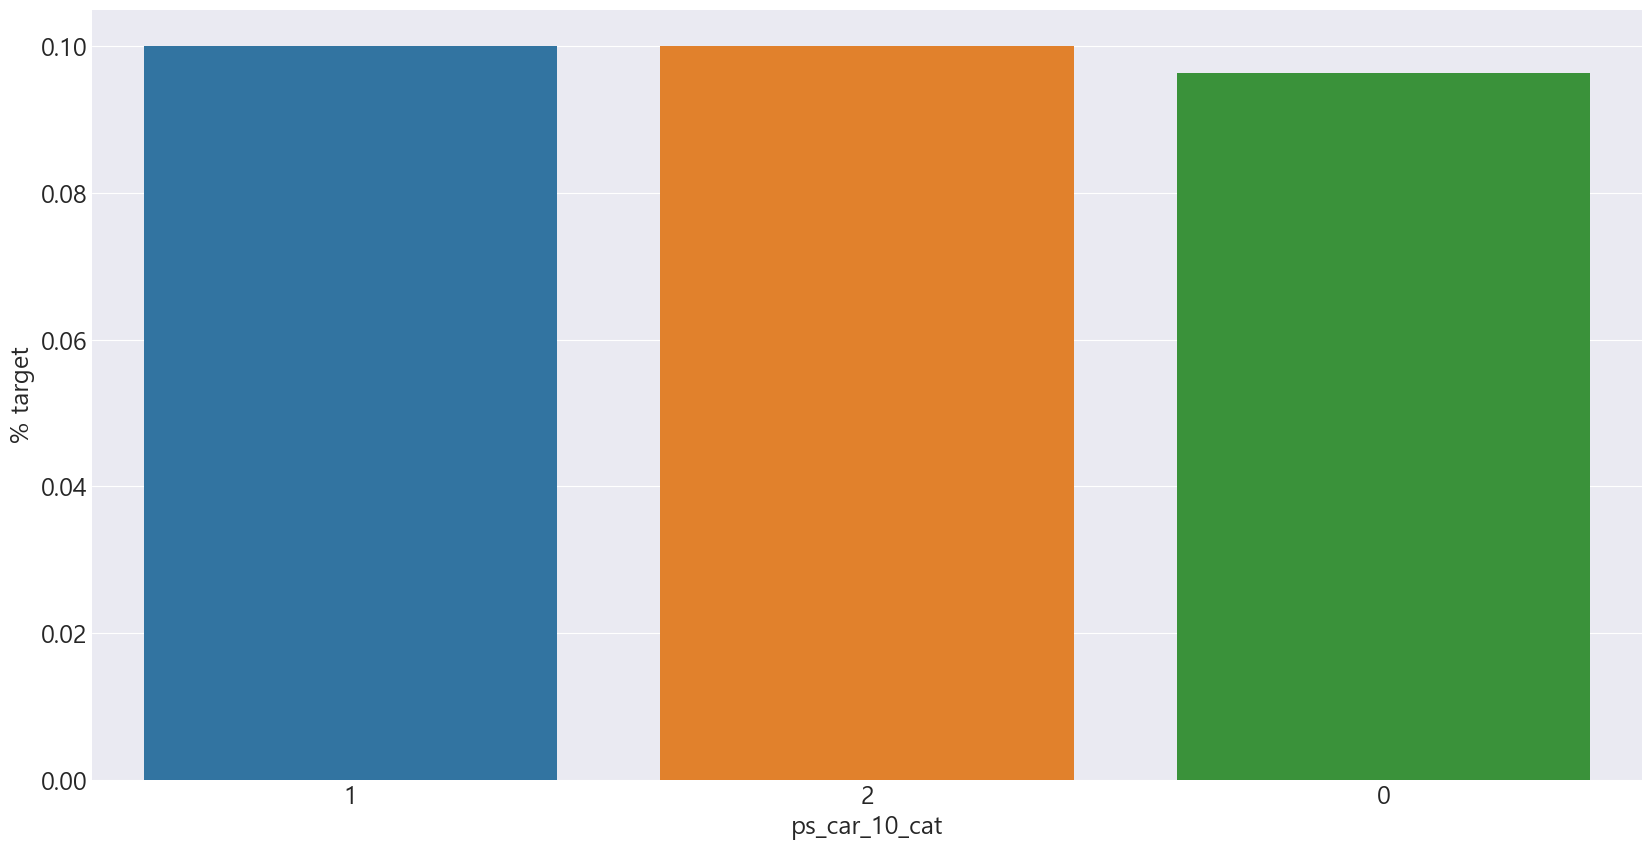

In [29]:
v = meta[(meta.level=='nominal')&(meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Calculate the precentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

### Interval variables

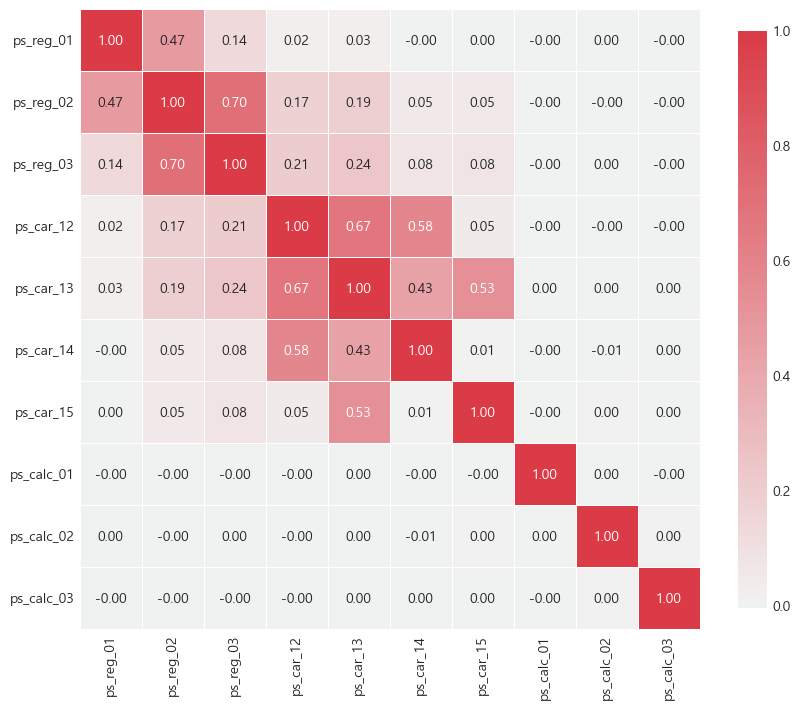

In [30]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})
    plt.show()
    
    
v = meta[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(v)

In [31]:
s = train.sample(frac=.1)

### ps_reg_02 and ps_reg_03

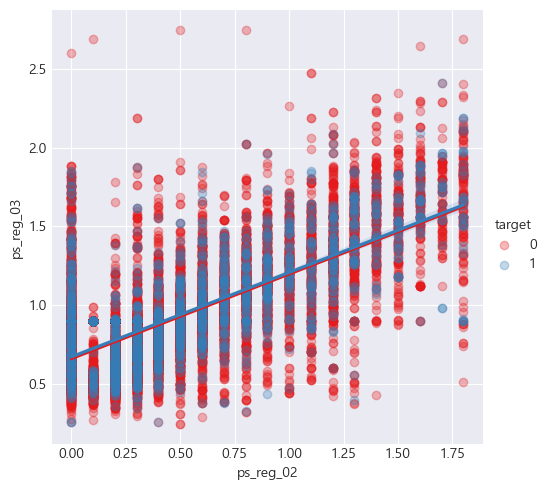

In [32]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_12 and ps_car_13

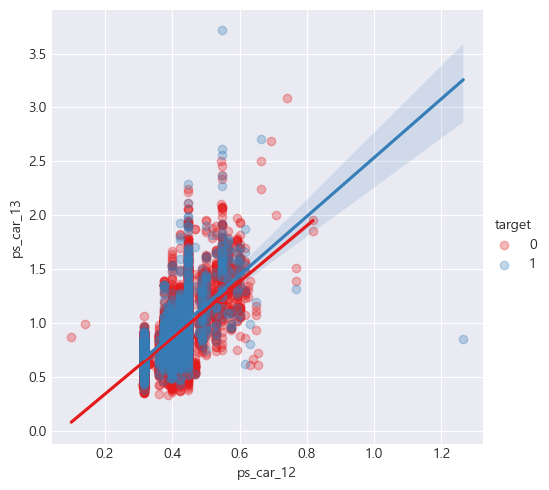

In [33]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_12 and ps_car_14

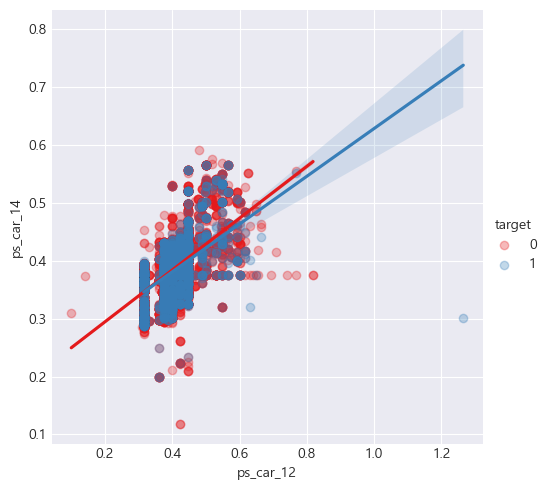

In [34]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_13 and ps_car_15

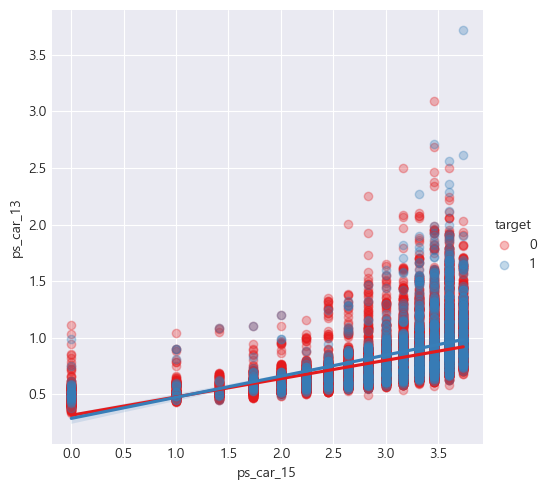

In [35]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### Checking the correlations between ordinal variables

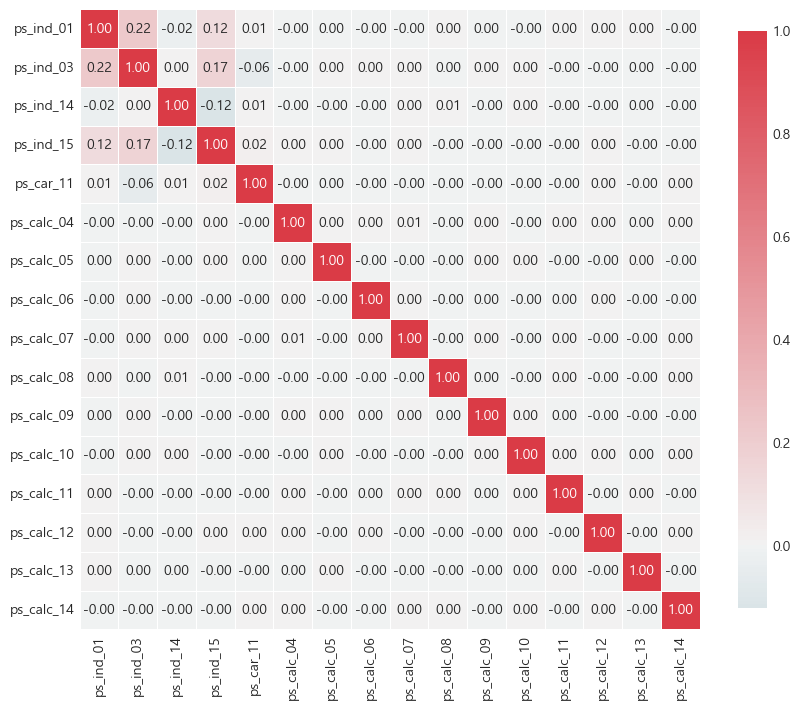

In [36]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
corr_heatmap(v)

## Feature engineering

### Creating dummy variables

In [37]:
v = meta[(meta.level=='nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


### Creating interaction variables

In [38]:
v = meta[(meta.level=='interval') & (meta.keep)].index

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
intersactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
intersactions.drop(v, axis=1, inplace=True) # Remove the original columns

# Concat the intersaction variables to the train data
print('Before creating intersactions we have {} variables in train'.format(train.shape[1]))

train = pd.concat([train, intersactions], axis=1)

print('After creating intersactions we have {} variables in train'.format(train.shape[1]))

Before creating intersactions we have 109 variables in train
After creating intersactions we have 164 variables in train


## Feature selection

### Removing features with low or zero variance

In [39]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


### Selecting features with a Random Forest and SelectFromModel

In [40]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in tqdm(range(X_train.shape[1])):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

  0%|          | 0/162 [00:00<?, ?it/s]

 1) ps_car_11_cat_te               0.021274
 2) ps_car_13                      0.017324
 3) ps_car_12 ps_car_13            0.017293
 4) ps_car_13^2                    0.017291
 5) ps_car_13 ps_car_14            0.017113
 6) ps_reg_03 ps_car_13            0.017109
 7) ps_car_13 ps_car_15            0.016895
 8) ps_reg_01 ps_car_13            0.016774
 9) ps_reg_03 ps_car_14            0.016151
10) ps_reg_03 ps_car_12            0.015573
11) ps_reg_03 ps_car_15            0.015217
12) ps_car_14 ps_car_15            0.015024
13) ps_car_13 ps_calc_01           0.014778
14) ps_car_13 ps_calc_03           0.014712
15) ps_reg_02 ps_car_13            0.014696
16) ps_reg_01 ps_reg_03            0.014639
17) ps_car_13 ps_calc_02           0.014635
18) ps_reg_01 ps_car_14            0.014405
19) ps_reg_03                      0.014188
20) ps_reg_03^2                    0.014155
21) ps_reg_03 ps_calc_03           0.013828
22) ps_reg_03 ps_calc_02           0.013751
23) ps_reg_03 ps_calc_01        

In [41]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))


n_features = sfm.transform(X_train).shape[1]
print('Number of Features after selection: {}'.format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of Features after selection: 81


In [42]:
train = train[selected_vars + ['target']]
train

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,...,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,target
0,1,1,11,0.6,0.6,0.838153,1.0,0.368782,0.540603,0.345688,...,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00,0
1,5,7,5,0.9,0.6,0.728440,1.0,0.424264,0.382953,0.378814,...,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36,0
2,4,3,4,0.9,0.6,0.869267,3.0,0.400000,0.814271,0.402368,...,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01,0
3,6,6,8,0.6,1.5,1.705872,2.0,0.400000,0.838387,0.378418,...,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01,0
4,5,5,10,0.8,0.8,1.086566,3.0,0.400000,0.905777,0.384838,...,2.163331,1.802776,3.244996,0.36,0.30,0.54,0.25,0.45,0.81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,5,7,8,0.6,0.4,1.537652,1.0,0.424264,1.269111,0.384708,...,1.581139,0.316228,1.581139,0.25,0.05,0.25,0.01,0.05,0.25,1
216936,1,5,4,0.3,0.4,0.898861,2.0,0.424264,0.756979,0.400000,...,0.600000,0.800000,1.200000,0.09,0.12,0.18,0.16,0.24,0.36,1
216937,0,6,9,0.9,0.3,0.711952,3.0,0.400000,0.970654,0.372424,...,1.732051,1.385641,2.078461,0.25,0.20,0.30,0.16,0.24,0.36,1
216938,0,2,2,0.6,0.1,0.577170,2.0,0.316228,0.876295,0.320780,...,1.870829,0.748331,2.244994,0.25,0.10,0.30,0.04,0.12,0.36,1


## Feature scaling

In [43]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])